# TP boosting
## dataset: MNIST

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("nb of train samples",len(y_train))

/home/lingrand/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


nb of train samples 60000


In [3]:
#quelques imports pour la suite
import numpy as np
from sklearn.utils import shuffle
import sklearn
import matplotlib.pyplot as plt

We choose 2 classes only for the binary classification: '4' and '8'. You can make another choice.

In [3]:
# class of '4'
x_train4 = x_train[y_train==4,:]
# class of '8'
x_train8 = x_train[y_train==8,:]

# together
x_trainBinaire = np.append(x_train4,x_train8,axis=0)
# positive class: '8' ; negative class: '4' 
y_trainBinaire = np.append(np.full(len(x_train4),-1), np.full(len(x_train8),1))

print(x_trainBinaire.shape, y_trainBinaire.shape)

# shuffle together
(x_trainBinaire,y_trainBinaire) = shuffle(x_trainBinaire,y_trainBinaire,random_state=0)

(11693, 28, 28) (11693,)


## simple boosting on the data


In [4]:
n = x_trainBinaire.shape[0]
x_trainBinaire = x_trainBinaire.reshape(n,-1)
print(x_trainBinaire.shape)

(11693, 784)


In [4]:
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.utils import shuffle

In [26]:
## boosting (Adaboost)
# object boosting
myboosting = sklearn.ensemble.AdaBoostClassifier(n_estimators=200, learning_rate=1, algorithm='SAMME.R')
# learning on the training dataset
myboosting.fit(x_trainBinaire,y_trainBinaire)
# prediction
y_predBinaire = myboosting.predict(x_trainBinaire)
print('confusion matrix on train data',confusion_matrix(y_trainBinaire,y_predBinaire))

confusion matrix on train data [[5842    0]
 [   0 5851]]


We printed the confusion matrix on train dataset. What is the influence of the variable n_estimators ?

It is possible to display nicely the confusion matrix. For that, read the documentation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html.

Now compute the confusion matrix on the test dataset

In [12]:
TO BE WRITTEN
# pre-processing of test dataset (2 classes ....)


# confusion matrix computation and display


(1956, 28, 28) (1956,)
confusion matrix [[975   7]
 [ 10 964]]


Text(0.5, 1.0, 'Matrice de confusion')

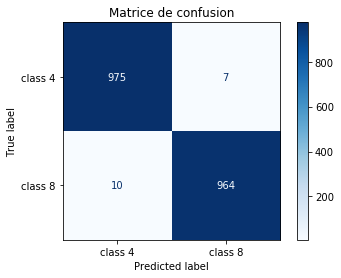

In [27]:
#choose classes 4 and 8
x_test4 = x_test[y_test==4,:]
x_test8 = x_test[y_test==8,:]

x_testBinaire = np.append(x_test4,x_test8,axis=0)
y_testBinaire = np.append(np.full(len(x_test4),-1), np.full(len(x_test8),1))

print(x_testBinaire.shape, y_testBinaire.shape)

(x_testBinaire,y_testBinaire) = shuffle(x_testBinaire,y_testBinaire,random_state=0)

nT = x_testBinaire.shape[0]
x_testBinaire = x_testBinaire.reshape(nT,-1)

# calcul de la matrice de confusion et affichage

y_predBinaire = myboosting.predict(x_testBinaire)
print('confusion matrix',confusion_matrix(y_testBinaire,y_predBinaire))

disp = plot_confusion_matrix(myboosting, x_testBinaire, y_testBinaire,
                                 display_labels=['class 4','class 8'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matrice de confusion')

## boosting on the 10 classes from MNIST:


In [5]:
n = x_train.shape[0]
xTrain = x_train.reshape(n,-1)
n = x_test.shape[0]
xTest = x_test.reshape(n,-1)

In [7]:
## boosting (Adaboost)
# object boosting
myboosting = sklearn.ensemble.AdaBoostClassifier(n_estimators=200, learning_rate=1, algorithm='SAMME.R')
# learning on the training dataset
myboosting.fit(xTrain,y_train)
# prediction
y_pred = myboosting.predict(xTest)
print('confusion matrix on test data',confusion_matrix(y_test,y_pred))

confusion matrix on test data [[ 867    0    5    1    1   21   81    2    1    1]
 [   0 1081    2   14    1    5    5   18    9    0]
 [  67   60  422   73   10   15  298   17   66    4]
 [ 103   33    9  620    3   89   32   21   84   16]
 [   5    1   21    7  780    9   29   47    5   78]
 [  67   29    7   63   10  513   88    6   77   32]
 [  10    3   18    1   21   15  886    0    3    1]
 [  26   26   28   10   28    2    1  750   10  147]
 [  31   63    8   67   16   38   59    8  664   20]
 [  15   19   19   13  221    3    0   64   32  623]]


In [9]:
print(myboosting.estimators_[0])

DecisionTreeClassifier(max_depth=1, random_state=393783479)


In [10]:
from sklearn import tree

[Text(0.5, 0.75, 'X[350] <= 131.5\ngini = 0.9\nsamples = 60000\nvalue = [0.099, 0.112, 0.099, 0.102, 0.097, 0.09, 0.099, 0.104\n0.098, 0.099]'),
 Text(0.25, 0.25, 'gini = 0.881\nsamples = 39160\nvalue = [0.091, 0.01, 0.08, 0.022, 0.089, 0.054, 0.08, 0.096\n0.051, 0.08]'),
 Text(0.75, 0.25, 'gini = 0.821\nsamples = 20840\nvalue = [0.008, 0.102, 0.02, 0.08, 0.008, 0.036, 0.019, 0.008\n0.046, 0.02]')]

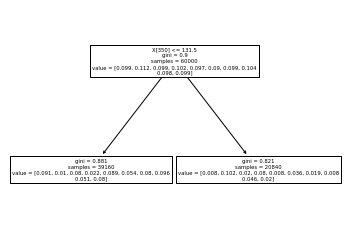

In [12]:
tree.plot_tree(myboosting.estimators_[0])

## binary boosting using Haar filters
The first step is the preparation of the data.

### Haar filters

In [29]:
from skimage import feature
from skimage import transform

For Haar filters, it is possible to generate them from the library tools or to build them by hand.

In [37]:
# automatic generation from:
#       'type-2-x' and 'type-2-y'
# and images dimension: 28x28
feat_coord, feat_type = feature.haar_like_feature_coord(4,4, ['type-2-x','type-2-y'])

How many filters ? And compared to pixels number ?

In [38]:
print(feat_coord)


[list([[(0, 0), (0, 0)], [(0, 1), (0, 1)]])
 list([[(0, 0), (0, 1)], [(0, 2), (0, 3)]])
 list([[(0, 0), (1, 0)], [(0, 1), (1, 1)]])
 list([[(0, 0), (1, 1)], [(0, 2), (1, 3)]])
 list([[(0, 0), (2, 0)], [(0, 1), (2, 1)]])
 list([[(0, 0), (2, 1)], [(0, 2), (2, 3)]])
 list([[(0, 1), (0, 1)], [(0, 2), (0, 2)]])
 list([[(0, 1), (1, 1)], [(0, 2), (1, 2)]])
 list([[(0, 1), (2, 1)], [(0, 2), (2, 2)]])
 list([[(0, 2), (0, 2)], [(0, 3), (0, 3)]])
 list([[(0, 2), (1, 2)], [(0, 3), (1, 3)]])
 list([[(0, 2), (2, 2)], [(0, 3), (2, 3)]])
 list([[(1, 0), (1, 0)], [(1, 1), (1, 1)]])
 list([[(1, 0), (1, 1)], [(1, 2), (1, 3)]])
 list([[(1, 0), (2, 0)], [(1, 1), (2, 1)]])
 list([[(1, 0), (2, 1)], [(1, 2), (2, 3)]])
 list([[(1, 0), (3, 0)], [(1, 1), (3, 1)]])
 list([[(1, 0), (3, 1)], [(1, 2), (3, 3)]])
 list([[(1, 1), (1, 1)], [(1, 2), (1, 2)]])
 list([[(1, 1), (2, 1)], [(1, 2), (2, 2)]])
 list([[(1, 1), (3, 1)], [(1, 2), (3, 2)]])
 list([[(1, 2), (1, 2)], [(1, 3), (1, 3)]])
 list([[(1, 2), (2, 2)], [(1, 3)

In [ ]:
# images transformation: we apply all filters
cpt=0

for image in x_trainBinaire:
    # integral image computation
    int_image = transform.integral_image(image)
    print(int_image.shape)
    # Haar filters computation
    features = feature.haar_like_feature(int_image, 0, 0, 28, 28,feature_type=feat_type,feature_coord=feat_coord)
    if cpt%1000 == 0:
        ftrain = [features]
    else:
        ftrain = np.append(ftrain,[features],axis=0)
    cpt += 1

You may encounter size problems. Try to remove some filters. Which ones ? How many ? That's the question ....

In [ ]:
# for you

Other alternatives: build the filters. As for example:

In [ ]:
feat_coord = np.array([list([[(0, 0), (6, 0)], [(6, 6), (6, 6)]]),
       list([[(0, 0), (0, 6)], [(0, 13), (0, 20)]])])

feat_type = np.array(['type-2-x', 'type-2-x'])


Applying Haar filters can take some time. Don't hesitate to save the results.

In [ ]:
# code for saving and loading python object
import pickle
# save ftrain in the file 'features.bin'
with open('features.bin', 'wb') as output:
        pickle.dump(ftrain, output, pickle.HIGHEST_PROTOCOL)
# load ftrain from the saved file
with open('features.bin', 'rb') as output:
        ftrain = pickle.load(output)


## binary boosting with Haar filters
Compare the different options for the filters. Compare with the first boosting in this notebook. 

In [ ]:
# for you  !

## 10 classes boosting with Haar filters
Same questions